In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [4]:
# beer_servings, wine_servings 두 피처 간의상관 계수
# pearson은 상관 계수를 구하는 계산 방법 중 가장 널리 쓰이는방법
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [6]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


In [8]:
!pip install seaborn

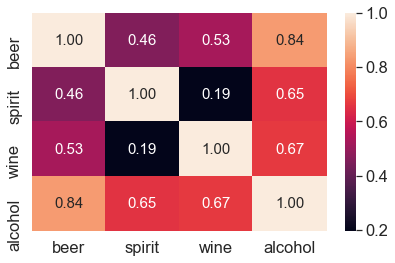

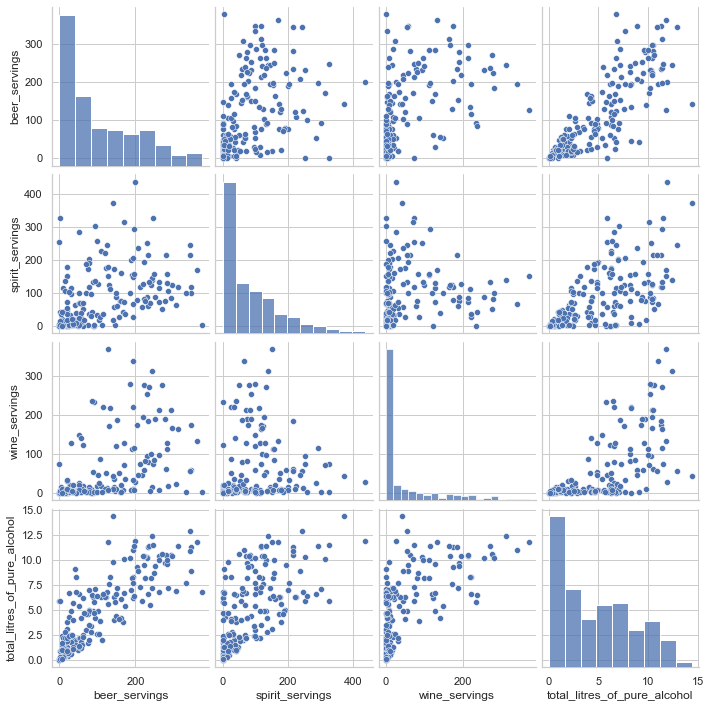

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr 히트맵
# 그래프 출력을 위한 cols 이름을 축약
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] 
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                fmt = '.2f',
                annot_kws = {'size':15},
                yticklabels = cols_view,
                xticklabels = cols_view)
plt.tight_layout()
plt.show()


# 삼전도 그래프
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()


In [22]:
drinks.info()
# continet에 23개의 결측 데이터가 있음. 이것을 OT로 넣어주자
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.info()

drinks['continent'].isnull().sum()
drinks['continent'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings  

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

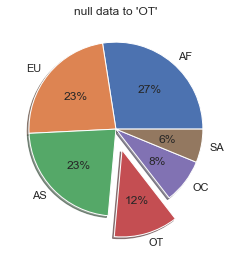

In [28]:
# 파이차트로 전체 대륙에서 OT가 차지하는 비율 확인

labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
# 값을 줌으로써 차트가 따로 돌출된 모양으로 표현됨
# drinks['continent'].value_counts()에 출력되는 순서대로 처리됨
# 즉, 4번째인 OT를 따로 출력하기 위해 네번째 값을 0.25로 줌
explode = ( 0, 0, 0, 0.25, 0, 0) 

plt.pie(fracs1, explode=explode, labels = labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

In [29]:
drinks['continent'].value_counts().index.tolist()

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [31]:
drinks['continent'].value_counts().values.tolist()

[53, 45, 44, 23, 16, 12]

In [43]:
# 대륙별 spirit_servings 평균, 최소, 최대, 합계 구하기
drinks.groupby('continent').spirit_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.339623,28.102794,0.0,1.00,3.0,19.00,152.0
AS,44.0,60.840909,84.362160,0.0,1.00,16.0,98.00,326.0
EU,45.0,132.555556,77.589115,0.0,81.00,122.0,173.00,373.0
OC,16.0,58.437500,70.504817,0.0,18.00,37.0,65.25,254.0
OT,23.0,165.739130,94.993884,68.0,101.00,137.0,190.50,438.0
SA,12.0,114.750000,77.077440,25.0,65.75,108.5,148.75,302.0


In [71]:
# 대륙별 spirit_servings 평균, 최소, 최대, 합계 구하기 A-1
# groupby('continent') 다음에 .spirit_servings.agg
result2 = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result2.head()


,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [63]:
# 대륙별 spirit_servings 평균, 최소, 최대, 합계 구하기 A-2
# groupby('continent') 다음에 ['spirit_servings'].agg
result = drinks.groupby('continent')['spirit_servings'].agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [67]:
# 전체 평균보다 많은 알콜을 섭취하는 대륙
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [69]:
# 평균 beer_servings 가 가장 높은 대륙은?
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)


EU


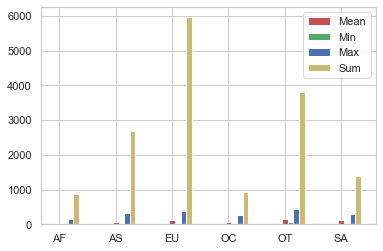

In [90]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

# numpy 사용
index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label = 'Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label = 'Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color = 'b', label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color = 'y', label= 'Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()


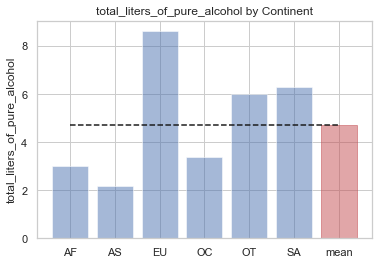

In [98]:
#대륙별 total_liters_of_pure_alcohol 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0.,6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_liters_of_pure_alcohol')
plt.title('total_liters_of_pure_alcohol by Continent')

plt.show()

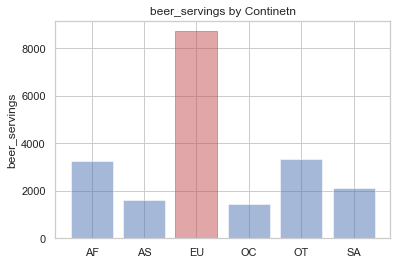

In [107]:
# 대륙별 beer_servings 시각화

beer_group = drinks.groupby('continent').beer_servings.sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align = 'center', alpha=0.5)
bar_list[continents.index('EU')].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continetn')

plt.show()


In [110]:
print(result['mean'].tolist())
print('----------------------')
print(result['min'].tolist())
print('----------------------')
print(result['max'].tolist())
print('----------------------')
print(result['sum'].tolist())

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
----------------------
[0, 0, 0, 0, 68, 25]
----------------------
[152, 326, 373, 254, 438, 302]
----------------------
[866, 2677, 5965, 935, 3812, 1377]


## t-test

In [111]:
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],
                                    europe['beer_servings'], equal_var=False)
print("The t-statistic and p-value assuming equal variance is %.3f and %.3f." %tTestResult)
print("The t-statistic and p-value not assuming equal variance is %.3f and %.3f" %tTestResultDiffVar)

The t-statistic and p-value assuming equal variance is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variance is -7.144 and 0.000


In [117]:
# 대한민국 술 소비량
# total_servings 피처
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알코올 비율 피처
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


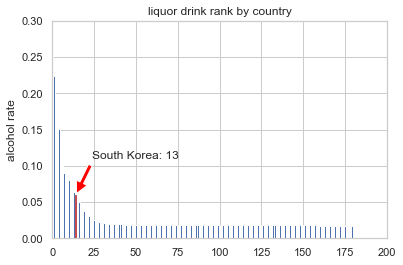

In [118]:
# 국가별 순위 정보 그래프 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea: ' + str(korea_rank -1),
            xy = (korea_rank, korea_alc_rate),
            xytext=(korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops = dict(facecolor='red', shrink=0.05))

plt.show()

# 연습문제

In [137]:
# 대륙별 평군 wine_servings
continent_wine = drinks.groupby('continent')['wine_servings'].mean()

# continent_wine을 data_frame에 넣기: groupby 연산 결과를 반환하면, 반환 데이터의 타입은 dataframe 타입이 아닙니다. 따라서 to_frame이라는 함수를 사용하여 dataframe 타입으로 변환한 뒤, 다시 이 dataframe의 index를 reset_index라는 함수로 설정하는 과정이 필요합니다. 그리고 이 과정으로 생성된 dataframe을 원래의 dataframe에 합쳐주어야 합니다. 이를 위해서는 merge 라는 함수를 또 새롭게 적용해야 하지요. 하지만 transform 함수가 있다면, 이 모든 과정을 단 한줄의 코드로 수행할 수 있습니다.
drinks['wine_servings_cont_avg'] = drinks.groupby('continent')['wine_servings'].transform(np.mean)

# 결과를 출력합니다.
drinks[['country', 'continent', 'wine_servings_cont_avg']].sample(5).head()

,country,continent,wine_servings_cont_avg
132,Paraguay,SA,62.416667
34,Chad,AF,16.264151
73,Haiti,OT,24.521739
123,Niger,AF,16.264151
36,China,AS,9.068182


In [136]:
# 국가별 모든 servings의 합을 계산한 total_servings라는 피처 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
drinks[['country', 'beer_servings', 'wine_servings', 'spirit_servings', 'total_servings']].sample(5).head()

,country,beer_servings,wine_servings,spirit_servings,total_servings
28,Cote d'Ivoire,37,7,1,45
59,Fiji,77,1,35,113
147,San Marino,0,0,0,0
48,Denmark,224,278,81,583
137,Qatar,1,7,42,50


In [140]:
# 전체평균보다 적은 알코올을 마시는 대륙 증, spirit를 가장 많이 마시는 국가
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
cont_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
less_mean = cont_mean[cont_mean <= total_mean].index.tolist()
df_continent_under_mean = drinks.loc[drinks.continent.isin(less_mean)]
most_spirit_under_mean = df_continent_under_mean.loc[df_continent_under_mean['spirit_servings'].idxmax()]

most_spirit_under_mean['country']

'Russian Federation'

In [141]:
# 술 소비량 대비 알코올 비율
# 술 소비량 대비 알콜 비율에 대한 칼럼을 만들어서 병합합니다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 술 소비량 대비 알콜 비율 : 전체 순위 중 한국의 순위를 구합니다.
drinks['alcohol_rate_rank'] = drinks['alcohol_rate'].rank(ascending=False)
drinks['alcohol_rate_rank'] = drinks['alcohol_rate_rank'].apply(np.floor)
drinks.loc[drinks['country'] == 'South Korea'].alcohol_rate_rank

138    15.0
Name: alcohol_rate_rank, dtype: float64

In [144]:
# 대륙별 술 소비량 대비 알코올 비율
continent_sum = drinks.groupby('continent').sum()
continent_sum['alcohol_rate_continent'] = continent_sum['total_litres_of_pure_alcohol'] / \
                                          continent_sum['total_servings']
continent_sum = continent_sum.reset_index()
continent_sum = continent_sum[['continent', 'alcohol_rate_continent']]

drinks = pd.merge(drinks, continent_sum, on='continent', how='outer')


drinks[['country', 'continent', 'alcohol_rate_continent']].sample(5).head()

,country,continent,alcohol_rate_continent
18,Laos,AS,0.020293
125,Niger,AF,0.031970
83,Spain,EU,0.018392
146,Canada,OT,0.017860
100,Comoros,AF,0.031970
